#### This project uses Financial Modeling Prep API to get financial data of companies. 
Here I used urlopen(urlopen() and response.read() and json (json.loads and json.dumps() libraries  to be able to get the data from the url and load it as dataframe.
Then matplotlib and seaborn for visualization.

Credits to:
https://site.financialmodelingprep.com/developer/docs#financial-statements
https://medium.datadriveninvestor.com/how-to-use-python-to-pull-financial-profitability-ratios-a-beginner-guide-5b85bfc81d91

urllib.request is a standard library for basic HTTP requests in Python, requiring more code. requests is a popular third-party library known for simplicity, with a higher-level interface and richer features like session handling and authentication. Developers generally prefer requests for its ease of use and functionality.

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Assuming microsoft_ratios_df is a DataFrame containing ratios for Microsoft

try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

In [2]:
# Here I used the API syntax for searching company names to get their stock code example below is for searching companies named with "Microsoft"
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url = "https://financialmodelingprep.com/api/v3/search?query=Microsoft&apikey=94419b70bf7aa44dd8b201bd3ba53053"
search_results = get_jsonparsed_data(url)
search_results = json.dumps(search_results, indent=2)
print(search_results)

[
  {
    "symbol": "MSFT.NE",
    "name": "Microsoft Corporation",
    "currency": "CAD",
    "stockExchange": "NEO",
    "exchangeShortName": "NEO"
  },
  {
    "symbol": "MSFT",
    "name": "Microsoft Corporation",
    "currency": "USD",
    "stockExchange": "NASDAQ Global Select",
    "exchangeShortName": "NASDAQ"
  },
  {
    "symbol": "MSF.F",
    "name": "Microsoft Corporation",
    "currency": "EUR",
    "stockExchange": "Frankfurt Stock Exchange",
    "exchangeShortName": "XETRA"
  },
  {
    "symbol": "MSF.DE",
    "name": "Microsoft Corporation",
    "currency": "EUR",
    "stockExchange": "Frankfurt Stock Exchange",
    "exchangeShortName": "XETRA"
  },
  {
    "symbol": "MSF.BR",
    "name": "Microsoft Corporation",
    "currency": "USD",
    "stockExchange": "Brussels",
    "exchangeShortName": "EURONEXT"
  },
  {
    "symbol": "4338.HK",
    "name": "Microsoft Corporation",
    "currency": "HKD",
    "stockExchange": "HKSE",
    "exchangeShortName": "HKSE"
  },
  {
    "

In [3]:
#Below is the API syntax for getting financial data of companies. Note only the 5 most recent years' data can be requested.
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url = "https://financialmodelingprep.com/api/v3/ratios/AAPL?limit=40&apikey=94419b70bf7aa44dd8b201bd3ba53053"
Ratios_APPL = get_jsonparsed_data(url)

url = "https://financialmodelingprep.com/api/v3/ratios/MSFT?limit=40&apikey=94419b70bf7aa44dd8b201bd3ba53053"
Ratios_MSFT = get_jsonparsed_data(url)

### Ratios_APPL

In [4]:
net_profit_margin_2023 = Ratios_APPL[0]['netProfitMargin']
print(net_profit_margin_2023)

0.2530623426432028


In [5]:
# Extract the first 5 'date' values
first_10_dates = [entry['date'] for entry in Ratios_APPL[:10]]

print(first_10_dates)

['2023-09-30', '2022-09-24', '2021-09-25', '2020-09-26', '2019-09-28']


In [6]:
#I created a dataframe containing only the ratios I wanted to look at for APPL
profitability_ratio_names = [
    'grossProfitMargin',
    'operatingProfitMargin',
    'pretaxProfitMargin',
    'netProfitMargin',
    'returnOnAssets',
    'returnOnEquity',
    'returnOnCapitalEmployed'
]

apple_ratios_data = []

# Assuming Ratios_APPL is a list of dictionaries containing ratios for different years
for year_data in Ratios_APPL[:10]:  # Considering 10 years of data
    year = year_data['calendarYear']
    ratio_row = {'Year': year}
    for ratio_name in profitability_ratio_names:
        ratio_row[ratio_name] = year_data.get(ratio_name, None)
    apple_ratios_data.append(ratio_row)

# Create a DataFrame from the collected data
apple_ratios_df = pd.DataFrame(apple_ratios_data)

print(apple_ratios_df)


   Year  grossProfitMargin  operatingProfitMargin  pretaxProfitMargin  \
0  2023           0.441311               0.298214            0.296740   
1  2022           0.433096               0.302887            0.302040   
2  2021           0.417794               0.297824            0.298529   
3  2020           0.382332               0.241473            0.244398   
4  2019           0.378178               0.245720            0.252666   

   netProfitMargin  returnOnAssets  returnOnEquity  returnOnCapitalEmployed  
0         0.253062        0.275098        1.560760                 0.551446  
1         0.253096        0.282924        1.969589                 0.600871  
2         0.258818        0.269742        1.500713                 0.483099  
3         0.209136        0.177256        0.878664                 0.303383  
4         0.212381        0.163230        0.610645                 0.274616  


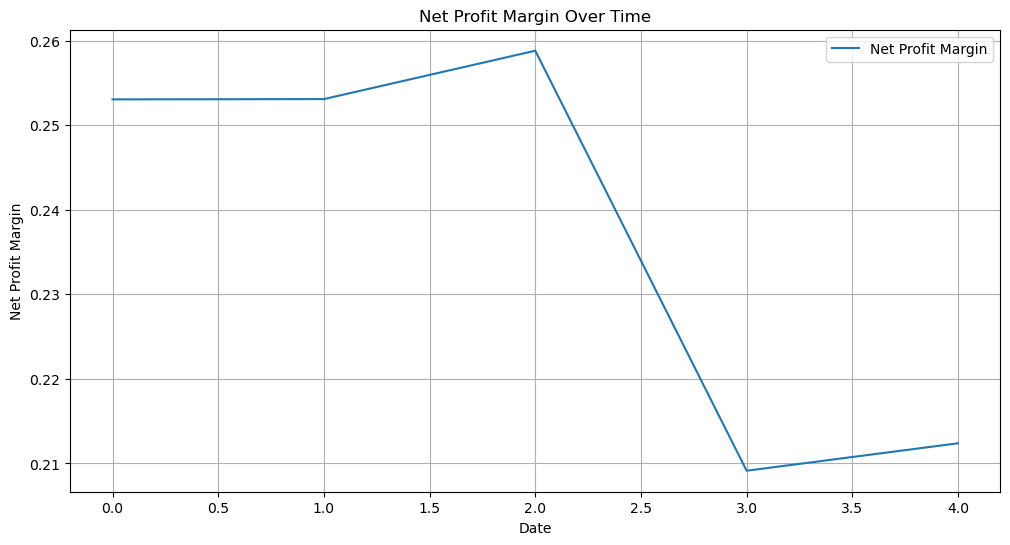

In [7]:
# Visualize Net Profit Margin over time
plt.figure(figsize=(12, 6))
plt.plot(apple_ratios_df.index, apple_ratios_df['netProfitMargin'], label='Net Profit Margin')
plt.title('Net Profit Margin Over Time')
plt.xlabel('Date')
plt.ylabel('Net Profit Margin')
plt.legend()
plt.grid(True)
plt.show()

### Microsoft ratios

In [8]:
# Used dumps() for pretty printing
Ratios_MSFT = json.dumps(Ratios_MSFT, indent=2)
print(Ratios_MSFT)

[
  {
    "symbol": "MSFT",
    "date": "2023-06-30",
    "calendarYear": "2023",
    "period": "FY",
    "currentRatio": 1.76916725076573,
    "quickRatio": 1.5357804683674352,
    "cashRatio": 0.3332149132492871,
    "daysOfSalesOutstanding": 83.85966071302173,
    "daysOfInventoryOutstanding": 13.854516192703034,
    "operatingCycle": 97.71417690572476,
    "daysOfPayablesOutstanding": 100.27898820278456,
    "cashConversionCycle": -2.564811297059805,
    "grossProfitMargin": 0.6892008588349102,
    "operatingProfitMargin": 0.417728806361041,
    "pretaxProfitMargin": 0.42144727838992047,
    "netProfitMargin": 0.3414623787839464,
    "effectiveTaxRate": 0.18978625253328257,
    "returnOnAssets": 0.175643726819038,
    "returnOnEquity": 0.35088714643856406,
    "returnOnCapitalEmployed": 0.28757386454079725,
    "netIncomePerEBT": 0.8102137474667174,
    "ebtPerEbit": 1.0089016413813359,
    "ebitPerRevenue": 0.417728806361041,
    "debtRatio": 0.14555459541332505,
    "debtEquityRa

In [9]:
# Create a DataFrame from the collected data of MSFT
profitability_ratio_names = [
    'grossProfitMargin',
    'operatingProfitMargin',
    'pretaxProfitMargin',
    'netProfitMargin',
    'returnOnAssets',
    'returnOnEquity',
    'returnOnCapitalEmployed'
]

microsoft_ratios_data = []

for year_data in Ratios_MSFT[:5]:
    year = year_data['calendarYear']
    ratio_row = {'Year': year}
    for ratio_name in profitability_ratio_names:
        ratio_row[ratio_name] = year_data.get(ratio_name, None)
    microsoft_ratios_data.append(ratio_row)

microsoft_ratios_df = pd.DataFrame(microsoft_ratios_data)

print(microsoft_ratios_df)

TypeError: string indices must be integers

In [ ]:
microsoft_ratios_df.info()

In [ ]:
# Updated the year column for the lineplot
microsoft_ratios_df['Year Updated'] = pd.to_datetime(microsoft_ratios_df['Year'])
microsoft_ratios_df['Year Updated'] = microsoft_ratios_df['Year Updated'].dt.year

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))

# Gross Profit Margin
sns.lineplot(data=microsoft_ratios_df, x='Year Updated', y='grossProfitMargin', ax=ax[0, 0])
ax[0, 0].set_title('Gross Profit Margin')
ax[0, 0].set_xlabel('Year Updated')
ax[0, 0].set_ylabel('Ratio Value')

# Operating Profit Margin
sns.lineplot(data=microsoft_ratios_df, x='Year Updated', y='operatingProfitMargin', ax=ax[0, 1])
ax[0, 1].set_title('Operating Profit Margin')
ax[0, 1].set_xlabel('Year Updated')
ax[0, 1].set_ylabel('Ratio Value')

# Pretax Profit Margin
sns.lineplot(data=microsoft_ratios_df, x='Year Updated', y='pretaxProfitMargin', ax=ax[1, 0])
ax[1, 0].set_title('Pretax Profit Margin')
ax[1, 0].set_xlabel('Year Updated')
ax[1, 0].set_ylabel('Ratio Value')

# Net Profit Margin
sns.lineplot(data=microsoft_ratios_df, x='Year Updated', y='netProfitMargin', ax=ax[1, 1])
ax[1, 1].set_title('Net Profit Margin')
ax[1, 1].set_xlabel('Year Updated')
ax[1, 1].set_ylabel('Ratio Value')

# Return on Assets
sns.lineplot(data=microsoft_ratios_df, x='Year Updated', y='returnOnAssets', ax=ax[2, 0])
ax[2, 0].set_title('Return on Assets')
ax[2, 0].set_xlabel('Year Updated')
ax[2, 0].set_ylabel('Ratio Value')

# Return on Equity
sns.lineplot(data=microsoft_ratios_df, x='Year Updated', y='returnOnEquity', ax=ax[2, 1])
ax[2, 1].set_title('Return on Equity')
ax[2, 1].set_xlabel('Year Updated')
ax[2, 1].set_ylabel('Ratio Value')

# Return on Capital Employed
sns.lineplot(data=microsoft_ratios_df, x='Year Updated', y='returnOnCapitalEmployed', ax=ax[3, 0])
ax[3, 0].set_title('Return on Capital Employed')
ax[3, 0].set_xlabel('Year Updated')
ax[3, 0].set_ylabel('Ratio Value')

# Remove the last subplot
fig.delaxes(ax[3, 1])

plt.tight_layout()
plt.show()
